## What is a neural network?

Its a computer system that tries to mimic the way the brain works. Think of it as a network of interconnected nodes that work together to solve a problem. 

In the brain, neurons are connected in complex networks, and they communicate with each other through electrical signals. Similarly, in a neural network, artificial neurons (also called nodes or units) are organized in interconnected layers, and they pass information through weighted connections.

### Input Layer

This is the initial layer of the the initial layer of the neural network where the input data is fed into the network.

In the case of a digit recognizer, each input sample would typically be an image of a handwritten digit. The pixels of the image would serve as the input values.

 It simply passes the input data to the next layer 🙂

### Hidden Layers

 These are intermediate layers between the input and output layers. They are called "hidden" because their computations are not directly observed from the outside.

 They perform complex computations and transformations on the input data, gradually extracting relevant features and patterns.

In the context of a digit recognizer, the hidden layers would learn to recognize different shapes, edges, and textures that are characteristic of handwritten digits.🙂

### Output Layer

The output layer is the final layer of the neural network that produces the network's predictions or outputs based on the computations performed by the previous layers.

In the case of a digit recognizer, the output layer would typically consist of ten neurons, each representing a digit from 0 to 9.🙂

## Convolutional Neural Networks (CNNs)

CNNs are a specific type of neural network architecture that is particularly well-suited for processing and analyzing visual data(images and videos). They are designed to automatically learn and extract meaningful features from images through the application of convolutional layers, pooling layers, and fully connected layers.

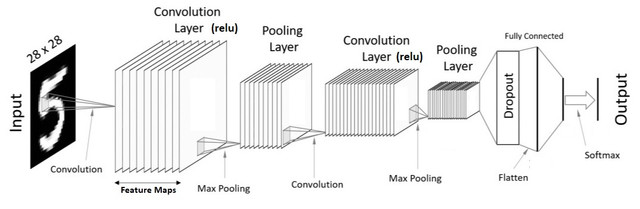


### Convolution 
Convolution is a mathematical operation that combines two functions to produce a third function.
In the context of CNNs, convolution involves sliding a small matrix called a kernel or filter over the input image and performing element-wise multiplication and summation.

### Feature Map

The output of the convolution operation is a feature map.
The feature map captures the presence of different features or patterns in the input.

### Pooling Layer

A pooling layer is a component commonly used in convolutional neural networks (CNNs) for downscaling or reducing the spatial dimensions of the feature maps. Its main purpose is to summarize and extract the most important information from the input.



### Fully Connected Layer

The fully connected layers are typically found at the end of a neural network architecture, following the convolutional and pooling layers in a CNN. These layers are responsible for learning high-level features and making predictions based on the learned features.

### Our data

MNIST digit recognizer dataset. It consists of a large collection of handwritten digits from 0 to 9, with a total of 60,000 training examples and 10,000 test examples.

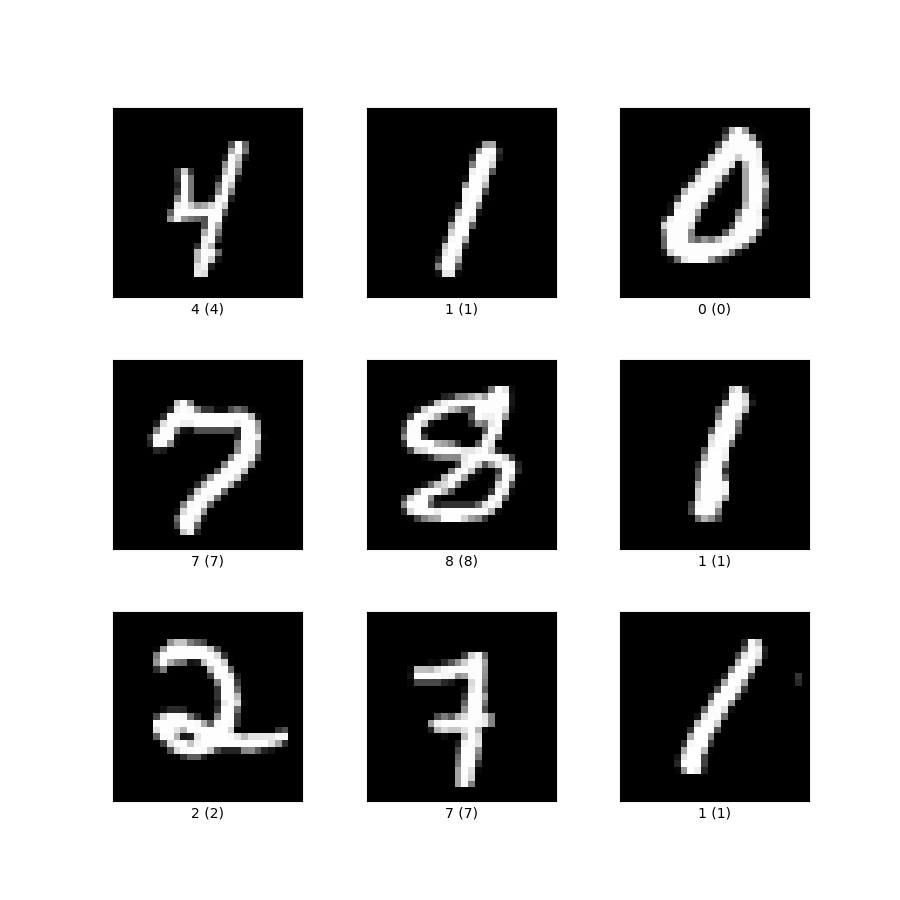

## Goals

The goal is to classify handwritten digit images into one of the ten possible classes representing digits 0 to 9.

#### Install Tensorflow

In [10]:
!pip install tensorflow

In [11]:
# Import Libraries

from tensorflow import keras
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
# from keras.optimizers import RMSprop
# from keras.preprocessing.image import ImageDataGenerator
# from keras.callbacks import ReduceLROnPlateau

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

### Data Processing

In [12]:
# Load the data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [13]:
# Preview

train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Get y_train

Y_train = train["label"] # dependent

# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) # Independent variables

In [16]:
Y_train.head() # View y_train

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

### Short EDA

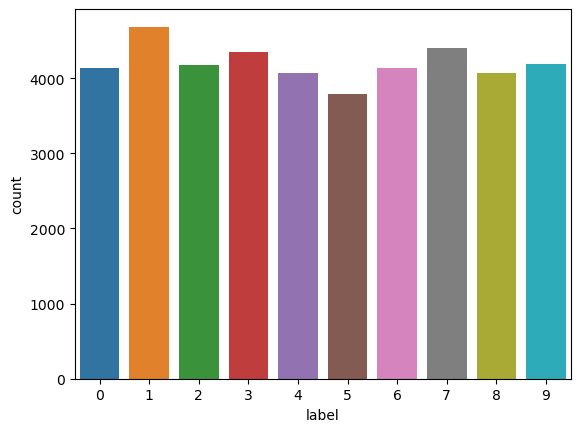

In [17]:
sns.countplot(x = Y_train); # Frequency of numbers 

In [18]:
Y_train.value_counts()  # Count the numbers

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

#### Handle Missing Data points



In [19]:
X_train.isnull().sum()

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64

In [20]:
# Check the data
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

No missing values in the data !!!

### Normalization

In [21]:
X_train = X_train / 255.0
test = test / 255.0

Grayscale images typically have pixel values ranging from 0 to 255, where 0 represents black and 255 represents white. By normalizing the data, the pixel values are rescaled to a range of 0 to 1.
To achieve the grayscale normalization, both the X_train and test datasets are divided by 255.0. Since the pixel values range from 0 to 255, dividing each pixel value by 255.0 scales the values to the range of 0 to 1

In [22]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

 The first dimension represents the batch size, the second and third dimensions represent the image dimensions (28x28), and the fourth dimension represents the channel (1 for grayscale). By using -1 in the first dimension, the reshape operation automatically calculates the appropriate batch size 

In [23]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes = 10)

In [24]:
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=8)

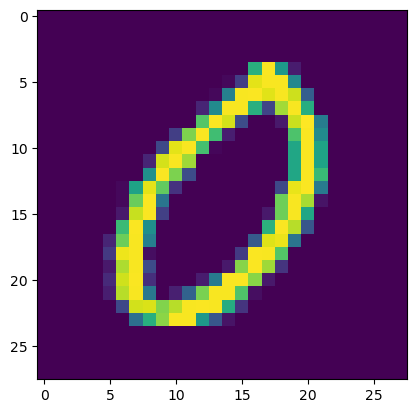

In [25]:
plt.imshow(X_train[0][:,:,0])  # selects the entire image array and extracts the values from the first (and only) channel.

### Modelling

In [26]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [27]:
model.compile(optimizer = 'sgd' , loss = "categorical_crossentropy", metrics=["accuracy"])

Categorical cross-entropy is a commonly used loss function for multi-class classification problems. It is well-suited for problems where the output is in the form of probabilities across multiple classes

In [28]:
# epochs = 1 # This can be tuned
# batch_size = 86

In [29]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_val, Y_val))


Epoch 1/10
1182/1182 [==============================] - 171s 144ms/step - loss: 0.8419 - accuracy: 0.7120 - val_loss: 0.1731 - val_accuracy: 0.9479
Epoch 2/10
1182/1182 [==============================] - 167s 141ms/step - loss: 0.2146 - accuracy: 0.9329 - val_loss: 0.0995 - val_accuracy: 0.9688
Epoch 3/10
1182/1182 [==============================] - 166s 140ms/step - loss: 0.1471 - accuracy: 0.9546 - val_loss: 0.0793 - val_accuracy: 0.9757
Epoch 4/10
1182/1182 [==============================] - 244s 207ms/step - loss: 0.1189 - accuracy: 0.9641 - val_loss: 0.0670 - val_accuracy: 0.9798
Epoch 5/10
1182/1182 [==============================] - 236s 200ms/step - loss: 0.1024 - accuracy: 0.9679 - val_loss: 0.0716 - val_accuracy: 0.9781
Epoch 6/10
1182/1182 [==============================] - 225s 191ms/step - loss: 0.0938 - accuracy: 0.9711 - val_loss: 0.0598 - val_accuracy: 0.9833
Epoch 7/10
1182/1182 [==============================] - 238s 202ms/step - loss: 0.0788 - accuracy: 0.9752 - val_

In [ ]:
# model.fit(X_train,Y_train, batch_size=batch_size,
#           epochs = epochs, validation_data = (X_val,Y_val),
#           verbose = 2, 
#           steps_per_epoch=X_train.shape[0] // batch_size)


In [ ]:
# # Fit the model
# history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
#                               epochs = epochs, validation_data = (X_val,Y_val),
#                               verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
#                               )